In [1]:
import glob
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

RES_DIR = "../sim_results/effects_of_homophily_on_misinformed"


### Define if you want to use `MIXED` or not below.

In [ ]:
MIXED = True
mixed_str = "_mixed" if MIXED else ""

### Load data

In [16]:
daily_fname = os.path.join(RES_DIR, f"daily_infected{mixed_str}.csv")
total_fname = os.path.join(RES_DIR, f"total_infected{mixed_str}.csv")

daily_frame = pd.read_csv(daily_fname)
total_frame = pd.read_csv(total_fname)

In [17]:
total_frame

,alpha,beta,total_ord_inf,total_mis_inf,total
0,0.50,0.1,0.004830,0.013379,0.018209
1,0.55,0.1,0.005564,0.017123,0.022687
2,0.60,0.1,0.006611,0.023008,0.029619
3,0.65,0.1,0.008115,0.032559,0.040674
4,0.70,0.1,0.010228,0.048251,0.058479
...,...,...,...,...,...
336,0.80,0.4,0.417379,0.498179,0.915558
337,0.85,0.4,0.414778,0.498344,0.913122
338,0.90,0.4,0.411804,0.498529,0.910333
339,0.95,0.4,0.408371,0.498738,0.907109


In [18]:
total_frame.head()

,alpha,beta,total_ord_inf,total_mis_inf,total
0,0.50,0.1,0.004830,0.013379,0.018209
1,0.55,0.1,0.005564,0.017123,0.022687
2,0.60,0.1,0.006611,0.023008,0.029619
3,0.65,0.1,0.008115,0.032559,0.040674
4,0.70,0.1,0.010228,0.048251,0.058479


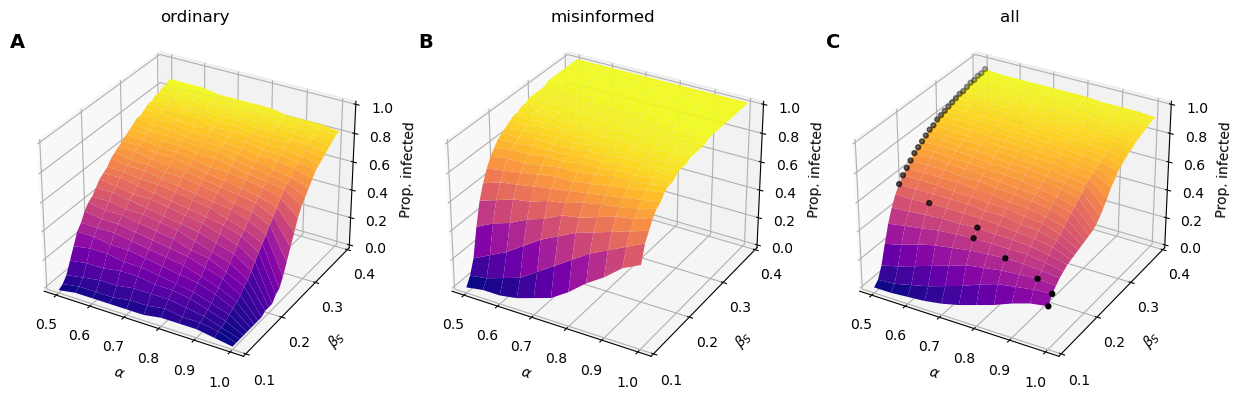

In [19]:
column_name_map = {
    "total_ord_inf" : "ordinary",
    "total_mis_inf" : "misinformed",
    "total" : "all"
}

fig = plt.figure(figsize=(12, 4))  # Adjust the figsize as needed
ax1 = fig.add_subplot(131, projection='3d')  # 1st subplot
ax2 = fig.add_subplot(132, projection='3d', sharez=ax1)  # 2nd subplot
ax3 = fig.add_subplot(133, projection='3d', sharez=ax1)  # 3rd subplot

column_ax_map = {
    "total_ord_inf" : ax1,
    "total_mis_inf" : ax2,
    "total" : ax3
}

for col in sorted(column_name_map.keys(), reverse=True):
    
    # Get our grid, based on the column
    reshaped_df = total_frame[
        ['alpha', 'beta', col]
    ].round(2).pivot( # Rounding ensures a cleaner plot
        index="alpha",
        columns="beta",
        values=col
    )
    
    if col in ["total_ord_inf", "total_mis_inf"]:
        reshaped_df = reshaped_df*2
    
    # Select the proper axis to draw on and set labels
    temp_ax = column_ax_map[col]
    temp_ax.set_xlabel(r'$\alpha$')
    temp_ax.set_ylabel(r'$\beta_{S}$')
    temp_ax.set_zlabel("Prop. infected")
    temp_ax.set_title(column_name_map[col], pad=0)
    temp_ax.set_ylim((total_frame.beta.min(), total_frame.beta.max()))
    temp_ax.set_zlim((0, 1))
    
    # Create a mesh grid of alpha and beta values
    alpha_values = reshaped_df.index.values
    beta_values = reshaped_df.columns.values
    alpha_mesh, beta_mesh = np.meshgrid(alpha_values, beta_values)

    # Get the corresponding values as a 2D array
    prop_infected_values = reshaped_df.values
    
    # Create the figure
    temp_ax.plot_surface(
        alpha_mesh,
        beta_mesh,
        prop_infected_values.T,
        cmap='plasma'
    )
    
    if col == "total":
        max_points = []
        
        # Iterate through beta values
        for beta_value in reshaped_df.columns:
            # Find the row with the maximum z-value for this beta
            alpha = reshaped_df.loc[:, beta_value].idxmax()
            infected_prop = reshaped_df.loc[alpha, beta_value]
            max_points.append((alpha, beta_value, infected_prop))

        # Convert the list of maximum points to a NumPy array for plotting
        max_points = np.array(max_points)

        # Plot the maximum points as a scatter plot on the "all" subplot
        temp_ax.scatter(
            max_points[:, 0], max_points[:, 1], max_points[:, 2],
            color='black',
            marker=".",
            s=50,
            label='Max infection'
        )


plt.tight_layout()

plt.subplots_adjust(wspace=.15)

ax1.annotate(
    "A",
    xy=(0.0, .95),
    xycoords=ax1.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)

ax2.annotate(
    "B",
    xy=(0.0, .95),
    xycoords=ax2.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)

ax3.annotate(
    "C",
    xy=(0.0, .95),
    xycoords=ax3.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
    va="center",
)

ticks = np.round(np.arange(.1,.4, .1), 2)
ax1.yaxis.set_ticks(ticks,ticks)
ax2.yaxis.set_ticks(ticks,ticks)
ax3.yaxis.set_ticks(ticks,ticks)


plt.savefig(f"../figures/mf_homophiliy_misinformed_effect_3d{mixed_str}.pdf", dpi=800, bbox_inches = "tight")
plt.savefig(f"../figures/mf_homophiliy_misinformed_effect_3d{mixed_str}.png", dpi=800, bbox_inches = "tight")

In [17]:
total_frame.beta.max()

0.3999999999999998

In [18]:
total_frame.beta.min()

0.1

In [6]:
reshaped_df

beta,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,...,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40
alpha,,,,,,,,,,,,,,,,,,,,,
0.50,0.02,0.05,0.13,0.26,0.38,0.47,0.54,0.59,0.63,0.66,...,0.87,0.88,0.89,0.89,0.90,0.91,0.91,0.92,0.92,0.93
0.55,0.02,0.07,0.16,0.30,0.41,0.48,0.54,0.59,0.63,0.66,...,0.87,0.88,0.88,0.89,0.90,0.90,0.91,0.91,0.92,0.92
0.60,0.03,0.09,0.21,0.33,0.42,0.49,0.55,0.59,0.63,0.66,...,0.86,0.87,0.88,0.89,0.89,0.90,0.91,0.91,0.92,0.92
0.65,0.05,0.13,0.25,0.36,0.44,0.50,0.55,0.59,0.62,0.65,...,0.86,0.87,0.88,0.89,0.89,0.90,0.90,0.91,0.92,0.92
0.70,0.07,0.17,0.29,0.38,0.45,0.50,0.55,0.59,0.62,0.65,...,0.86,0.87,0.87,0.88,0.89,0.90,0.90,0.91,0.91,0.92
0.75,0.10,0.22,0.32,0.40,0.46,0.51,0.55,0.58,0.61,0.64,...,0.85,0.86,0.87,0.88,0.89,0.89,0.90,0.91,0.91,0.92
0.80,0.15,0.26,0.35,0.41,0.46,0.50,0.54,0.58,0.61,0.63,...,0.85,0.86,0.87,0.87,0.88,0.89,0.90,0.90,0.91,0.92
0.85,0.19,0.29,0.36,0.42,0.46,0.50,0.53,0.56,0.59,0.62,...,0.84,0.85,0.86,0.87,0.88,0.89,0.89,0.90,0.91,0.91
0.90,0.24,0.32,0.37,0.42,0.46,0.49,0.52,0.55,0.57,0.60,...,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.90,0.91


/var/folders/y9/5qn5vmv17gq4y8pznf1p8wb9s4pymq/T/ipykernel_22258/302768850.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


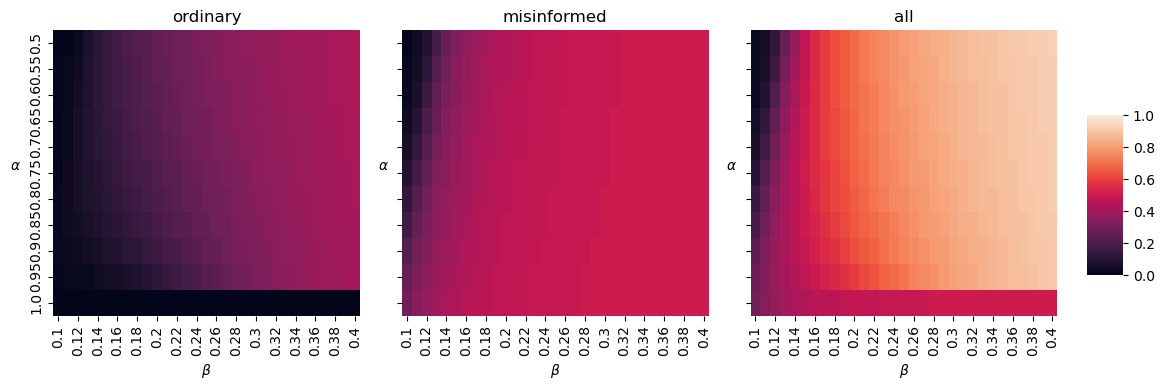

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True, sharey=True)

column_ax_map = {
    "total_ord_inf" : axes[0],
    "total_mis_inf" : axes[1],
    "total" : axes[2]
}

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for idx, col in enumerate(sorted(column_name_map.keys(), reverse=True)):
    
    # Get our grid, based on the column
    reshaped_df = total_frame[
        ['alpha', 'beta', col]
    ].round(2).pivot( # Rounding ensures a cleaner plot
        index="alpha",
        columns="beta",
        values=col
    )
    
    # Select the proper axis to draw on and set labels
    temp_ax = column_ax_map[col]
    temp_ax.set_title(column_name_map[col])
    
    sns.heatmap(
        data = reshaped_df,
        ax = temp_ax,
        cbar = True,
        cbar_ax=cbar_ax,
#         annot=True,
        vmin=0, vmax=1
    )
    
    temp_ax.set_ylabel(r"$\alpha$", rotation=0, labelpad=10)
    temp_ax.set_xlabel(r"$\beta$")
    

fig.tight_layout(rect=[0, 0, .9, 1])

plt.savefig("../figures/mf_homophiliy_misinformed_effect_heatmap.pdf", dpi=800)
plt.savefig("../figures/mf_homophiliy_misinformed_effect_heatmap.png", dpi=800)